#Major Project 1
by Likhith U 

tasks to do: 

1.   performing Exploratory Data Analysis on chocolate bar ratings 2022.csv dataset 

2.   Applying suitable regressor, classifier or clustering model to predict ratings.

3.   Calculate accuracy of model.



##Importing Tools

In [108]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

##Exploratory Data Analysis

### Step 1: Data Preprocessing and understanding

In [73]:
data = pd.read_csv('/content/Chocolate bar ratings 2022.csv')

In [74]:
data.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50


In [75]:
data.tail()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
2583,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2584,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2585,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00
2586,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25
2587,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50


In [76]:
data.dtypes

REF                                   int64
Company (Manufacturer)               object
Company Location                     object
Review Date                           int64
Country of Bean Origin               object
Specific Bean Origin or Bar Name     object
Cocoa Percent                        object
Ingredients                          object
Most Memorable Characteristics       object
Rating                              float64
dtype: object

From this we understood that, we need to change Cocoa Percent dtype from object to float16 of range 0 to 1

In [77]:
data.describe()

,REF,Review Date,Rating
count,2588.000000,2588.000000,2588.000000
mean,1459.185471,2014.545209,3.198319
std,773.852201,4.082722,0.444069
min,5.000000,2006.000000,1.000000
25%,820.000000,2012.000000,3.000000
50%,1470.000000,2015.000000,3.250000
75%,2122.000000,2018.000000,3.500000
max,2768.000000,2022.000000,4.000000


In [78]:
data.nunique()

REF                                  644
Company (Manufacturer)               593
Company Location                      65
Review Date                           17
Country of Bean Origin                63
Specific Bean Origin or Bar Name    1643
Cocoa Percent                         46
Ingredients                           21
Most Memorable Characteristics      2545
Rating                                12
dtype: int64

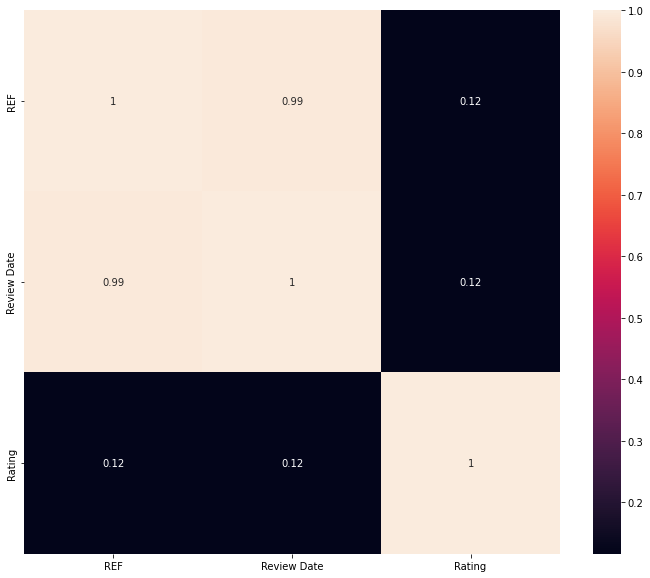

In [79]:
plt.figure(figsize=(12,10))
sbn.heatmap(data.corr(),annot=True)
plt.show()

Therefore, REF and Review Date is not providing any useful data for prediction of rating.

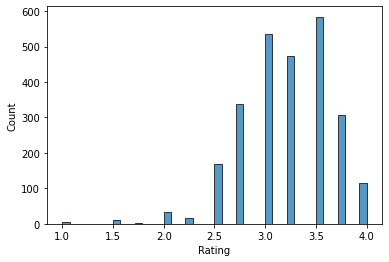

In [80]:
sbn.histplot(data , x =data['Rating'],stat ='count')

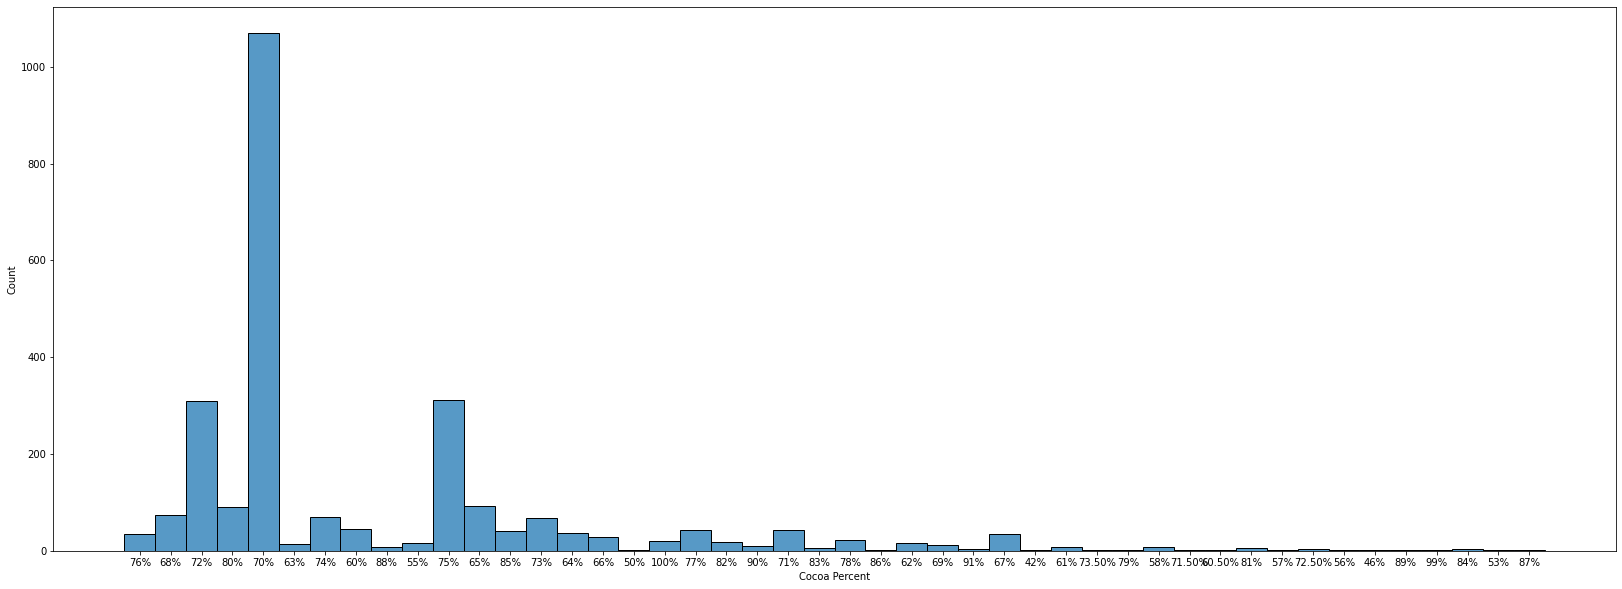

In [81]:
plt.figure(figsize=(28,10))
sbn.histplot(data , x =data['Cocoa Percent'],stat ='count')
plt.show()

###Step 2: Data Cleaning

#### Remove Null or nan values

In [82]:
data.isnull().sum()

REF                                  0
Company (Manufacturer)               0
Company Location                     0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         87
Most Memorable Characteristics       0
Rating                               0
dtype: int64

In [83]:
data[data.isna().any(axis=1)]

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
88,1964,Amazing Cacao,Russia,2017,Peru,Maranon,70%,NaN,"raisins, pungent",3.00
89,1964,Amazing Cacao,Russia,2017,Peru,Platan Bajo,70%,NaN,"few grits, blackcherry, licorice",3.50
167,486,Artisan du Chocolat,U.K.,2010,Venezuela,Venezuela,100%,NaN,"very nutty, very bitter",1.75
303,81,Bonnat,France,2006,Blend,One Hundred,100%,NaN,"acidic, bitter, dry",1.50
330,341,Bouga Cacao (Tulicorp),Ecuador,2009,Ecuador,"El Oro, Hacienda de Oro",100%,NaN,"cardboard, very bitter, floral",1.50
...,...,...,...,...,...,...,...,...,...,...
2478,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",100%,NaN,"bland, mild fruit, strong bitter",2.00
2479,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",90%,NaN,"some fruit, strong bitter",2.00
2480,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",75%,NaN,"cocoa,earthy,very astringent",3.00
2505,733,Whittakers,New Zealand,2011,Ghana,Ghana,72%,NaN,"sticky, dry, vanilla dominates",2.50


In [84]:
#Ingredients has 87 null values, drop all rows where ingredients are null
data.dropna(inplace = True)

In [85]:
data.isnull().sum()

REF                                 0
Company (Manufacturer)              0
Company Location                    0
Review Date                         0
Country of Bean Origin              0
Specific Bean Origin or Bar Name    0
Cocoa Percent                       0
Ingredients                         0
Most Memorable Characteristics      0
Rating                              0
dtype: int64

In [86]:
data.shape

(2501, 10)

#### Remove Outliers using quartile

In [87]:
#Since all the necessary data columns has valid values(understood from histplots), there are no outliers

#### Changing irrelavant Dtypes

In [88]:
def change(data):
  return data.apply(lambda x: float( x.strip('%') )/100)

In [89]:
data['Cocoa Percent'] = change(data['Cocoa Percent'])
data['Cocoa Percent']

0       0.76
1       0.76
2       0.76
3       0.68
4       0.68
        ... 
2583    0.80
2584    0.75
2585    0.75
2586    0.70
2587    0.72
Name: Cocoa Percent, Length: 2501, dtype: float64

### Step 3: Removing unnecessary columns

REF and Review Date are not required

In [90]:
data.drop(['REF', 'Review Date'], axis = 1, inplace= True)
data.head()

,Company (Manufacturer),Company Location,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,5150,U.S.A.,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,5150,U.S.A.,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75
2,5150,U.S.A.,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50
3,5150,U.S.A.,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00
4,5150,U.S.A.,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50


In [91]:
data.shape

(2501, 8)

## OneHot Encoding Non numeric data

In [92]:
data.columns = ['Company','Company Location', 'Bean Origin', 'Bean type', 'Cocoa Percent', 'Ingredients', 'MMC','Rating']

In [93]:
data.head()

,Company,Company Location,Bean Origin,Bean type,Cocoa Percent,Ingredients,MMC,Rating
0,5150,U.S.A.,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,5150,U.S.A.,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75
2,5150,U.S.A.,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50
3,5150,U.S.A.,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00
4,5150,U.S.A.,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50


In [94]:
categorical_features = ['Company','Company Location', 'Bean Origin', 'Bean type', 'Ingredients', 'MMC']

In [95]:
def onehot_encode(data, columns):
  for column in columns:
    dummies = pd.get_dummies(data[column])
    data = pd.concat([data, dummies],axis = 1 )
    data.drop(column, axis = 1, inplace = True)
  return data

In [96]:
data = onehot_encode(data, categorical_features)

In [97]:
data

,Cocoa Percent,Rating,5150,A. Morin,AMMA,Acalli,Adi aka Fijiana (Easy In Ltd),Aelan,Aequare (Gianduja),Ah Cacao,...,"woody, mocha, molasses","woody, nutty, off sour note","woody, nutty, short","woody, red berry, sour","woody, red fruit, sour","woody, spicy, tobacco","woody, sweet, unrefined","woody, toast, pepper",yellow fruit,"yogurt, lemon, licorice"
0,0.76,3.25,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.76,3.75,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.76,3.50,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.68,3.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.68,3.50,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,0.80,2.75,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2584,0.75,3.75,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2585,0.75,3.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2586,0.70,3.25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Independent and Dependent variable

In [100]:
X = data.drop('Rating', axis = 1)
Y = data['Rating']

In [102]:
X.head()

,Cocoa Percent,5150,A. Morin,AMMA,Acalli,Adi aka Fijiana (Easy In Ltd),Aelan,Aequare (Gianduja),Ah Cacao,Akesson's (Pralus),...,"woody, mocha, molasses","woody, nutty, off sour note","woody, nutty, short","woody, red berry, sour","woody, red fruit, sour","woody, spicy, tobacco","woody, sweet, unrefined","woody, toast, pepper",yellow fruit,"yogurt, lemon, licorice"
0,0.76,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.76,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.76,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.68,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.68,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
Y.head()

0    3.25
1    3.75
2    3.50
3    3.00
4    3.50
Name: Rating, dtype: float64

Using MinMaxScaler to scale up independent variable

In [105]:
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

In [106]:
X.head()

,Cocoa Percent,5150,A. Morin,AMMA,Acalli,Adi aka Fijiana (Easy In Ltd),Aelan,Aequare (Gianduja),Ah Cacao,Akesson's (Pralus),...,"woody, mocha, molasses","woody, nutty, off sour note","woody, nutty, short","woody, red berry, sour","woody, red fruit, sour","woody, spicy, tobacco","woody, sweet, unrefined","woody, toast, pepper",yellow fruit,"yogurt, lemon, licorice"
0,0.586207,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.586207,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.586207,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.448276,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.448276,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split into training and testing set

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

## Training

In [148]:
inputs = tf.keras.Input(shape=(4771,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs= outputs)

In [150]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics = [tf.keras.metrics.Accuracy()] #for calculating accuracy of model
)

In [141]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 4771)]            0         
                                                                 
 dense_12 (Dense)            (None, 16)                76352     
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 76,641
Trainable params: 76,641
Non-trainable params: 0
_________________________________________________________________


In [151]:
epochs =4
batch_size = 32
history = model.fit(
    X_train,Y_train,
    validation_split = 0.2,
    epochs= epochs,
    batch_size = batch_size,
    verbose = 1
)

Epoch 1/4
50/50 [==============================] - 2s 15ms/step - loss: 8.3531 - accuracy: 0.0000e+00 - val_loss: 5.5237 - val_accuracy: 0.0000e+00
Epoch 2/4
50/50 [==============================] - 0s 10ms/step - loss: 2.7015 - accuracy: 0.0000e+00 - val_loss: 0.6257 - val_accuracy: 0.0000e+00
Epoch 3/4
50/50 [==============================] - 0s 9ms/step - loss: 0.2647 - accuracy: 0.0000e+00 - val_loss: 0.2064 - val_accuracy: 0.0000e+00
Epoch 4/4
50/50 [==============================] - 0s 9ms/step - loss: 0.1561 - accuracy: 0.0000e+00 - val_loss: 0.1945 - val_accuracy: 0.0000e+00


In [152]:
history.history

{'loss': [8.3530855178833,
  2.7014520168304443,
  0.2647177577018738,
  0.15614309906959534],
 'accuracy': [0.0, 0.0, 0.0, 0.0],
 'val_loss': [5.523733615875244,
  0.6256982684135437,
  0.20641577243804932,
  0.1945229470729828],
 'val_accuracy': [0.0, 0.0, 0.0, 0.0]}

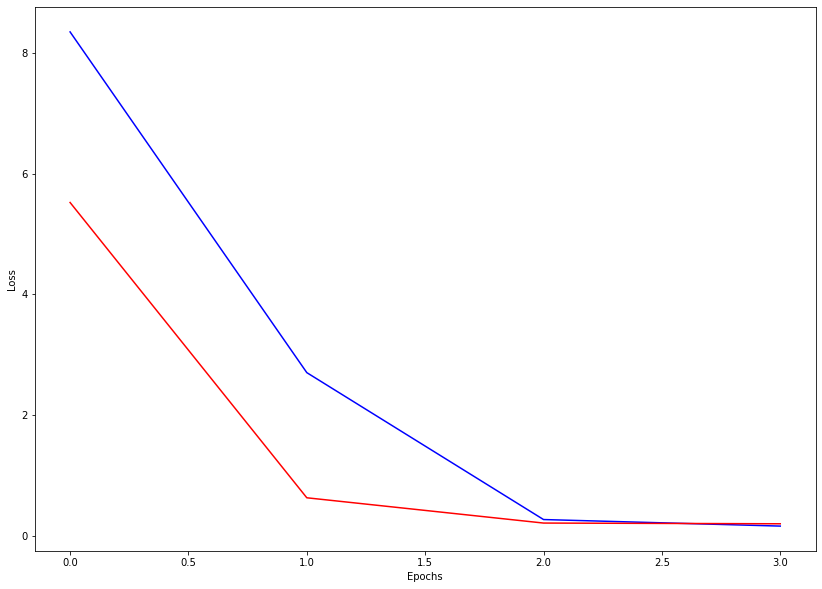

In [153]:
plt.figure(figsize=(14,10))
plt.plot(range(epochs),history.history['loss'],color='b')
plt.plot(range(epochs),history.history['val_loss'],color='r')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [154]:
np.argmin(history.history['val_loss'])

3

##Testing and Evaluation

In [155]:
model.evaluate(X_test,Y_test)

16/16 [==============================] - 0s 3ms/step - loss: 0.1836 - accuracy: 0.0000e+00


[0.18358266353607178, 0.0]

#Conclusion
used keras artificial neural network with ReLu activation function to predict with regression model. Prediction was accurate with 0.19 percent loss.

##Reference
Data : https://www.kaggle.com/datasets/nyagami/chocolate-bar-ratings-2022